## Preprocessing

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import nltk
import spacy

from spacy.lang.en.stop_words import STOP_WORDS
nltk.download('omw-1.4')

import re

[nltk_data] Downloading package omw-1.4 to /home/vincent/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [3]:
co_stops = ["li","le","e","u","a","la","ancu","unn","ellu","elli","ss","cu", 'ju', 'ja',"cume","ella","elle","quellu","quelle","quelli","quella","so","aghju","aghiu","he","simu","avemu","site","hannu","hanu","pe","par","seraghiu","sera","sara","oramai","tuttu","chi","quessu","quessa","quesse","quessi","bellu","bonu","bona","bon","boni","bone","boni","be","benche","mo", "lu", "cu","incu","nostru","vostru",'cusi','cun','st','bi', 'micca', 'altru','to','avia', 'stu', 'quandu', 'dopu','ca', 'ava', 'sottu', 'pocu','tutt', 'ind', 'inde', 'unu', 'tantu',"ssu","cu","micca", 'dui','oh', 'fattu', 'vo', 'eiu', 'gran', 'bella', 'eccu', 'cum','nun', 'caru','cara','cari']

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("datasets/full_corsican_withoutSW_dataset.tsv", '\t')
df = df.drop('Unnamed: 0', axis=1)
df

<ipython-input-5-8b1398e6dde1>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv("datasets/full_corsican_withoutSW_dataset.tsv", '\t')


,Texts,Auteurs,Type,Position,Arks
0,corsicum legitur cu analoga sentenza dutturoni...,P. di B.,art,1,bpt6k1330966k
1,lettera ajaccina caru cumpare piuviscata sti d...,Altore,let,2,bpt6k1330966k
2,lettera nizza sgio direttore attempu postu ped...,Inconnu,let,3,bpt6k1330966k
3,puntu vista storia quistione punti vista stu p...,U Balaninu,art,4,bpt6k1330966k
4,musa voli stammi senla bisugnarisli musa cunte...,Leca di Furcatu,poe,7,bpt6k1330966k
...,...,...,...,...,...
1872,raconti muvra cuccucciu scaffone sottu bavellu...,Martinu Appinzapalu,his,4,bpt6k13309974
1873,lettara venacu caru sgio direttore qualita abb...,Lucianu Pergola,let,5,bpt6k13309974
1874,santa fede catechismu corsu seguitu ve martiri...,Saveriu Malaspina,art,8,bpt6k13309974
1875,orsu orezza valle piedicroce tutt affattu inas...,Ghiuvanni Olivieri,poe,9,bpt6k13309974


In [6]:
df_type = df[df['Type'].str.contains("poe")]
df_type

,Texts,Auteurs,Type,Position,Arks
4,musa voli stammi senla bisugnarisli musa cunte...,Leca di Furcatu,poe,7,bpt6k1330966k
5,funtana funtana agnarellu acqua fresca delizio...,A. F. Franchi,poe,8,bpt6k1330966k
6,cunvaliscenza amicu sla sellimuna passata stat...,U Patriotta,poe,9,bpt6k1330966k
8,calvi calvi poaru calvi ava frittu compie vind...,U Babbuziu,poe,2,bpt6k1330850c
9,muvra maldicenti cani muvra unn vo muvra canto...,U Sampetracciu,poe,3,bpt6k1330850c
...,...,...,...,...,...
1866,natura naturali monti corsi alta porta arditu ...,V. G. d'Altimonti,poe,7,bpt6k1330783d
1867,almanaccu muvra sgueltra amata fi scurdata ors...,L'Orzu d'Orezza,poe,9,bpt6k1330783d
1871,sunettu 1 ministri francia sfracellata misgia ...,Paoli di Tagliu,poe,3,bpt6k13309974
1875,orsu orezza valle piedicroce tutt affattu inas...,Ghiuvanni Olivieri,poe,9,bpt6k13309974


In [7]:
len(df_type)

851

In [8]:
corpus = df_type['Texts'].tolist()

## Topic modeling

### Entropy

In [9]:
import nltk
import numpy as np
import math
import itertools
import operator as op
import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer

In [10]:
tokenizer = RegexpTokenizer(r'\w+')

In [11]:
tokens = [tokenizer.tokenize(x) for x in corpus]

In [12]:
frequence = dict(nltk.FreqDist(list(itertools.chain.from_iterable(tokens))))

In [13]:
vocabulaire = list(frequence.keys())
len(vocabulaire)

30455

In [14]:
def probability(i, j):
    tf = op.countOf(j, i)
    gf = frequence[i]
    return tf/gf, gf

In [15]:
number_of_docs = len(corpus)

In [16]:
dic = {}
for mot in vocabulaire:
    probs = []
    
    for doc in tokens:
        prob, freq = probability(mot, doc)
        probs.append(prob)
        
    count = [probs.index(x) for x in probs if x > 0]
    # Classification Token-Entropy
    
    entropie = -sum([probs[i] * np.log2(probs[i]) for i in count])/np.log2(number_of_docs)
    
    if entropie == -0.0:
        entropie = 0
        
    #print(f"The entropy of the word « {mot} » is {entropie}")
    
    weight = freq * entropie
    
    #print(f"The weight of the word « {mot} » is {weight}")
    
    dic[mot] = [entropie, weight]

In [17]:
len(dic)

30455

In [18]:
dic2 = {key:val for key, val in dic.items() if val != [0, 0]}

In [19]:
len(dic2)

9838

In [20]:
classification = pd.DataFrame(data=dic2, index=["Entropy", "Weight score"]).T

In [21]:
classification

,Entropy,Weight score
musa,0.661778,93.972409
voli,0.576313,35.155122
stammi,0.288436,2.019054
cuntentu,0.543486,25.000368
cunfusa,0.288436,2.019054
...,...,...
falgina,0.102743,0.205486
ammanta,0.102743,0.205486
prighere,0.102743,0.205486
purtati,0.102743,0.205486


In [22]:
from statistics import mean
from statistics import median
from statistics import stdev

In [23]:
ent_moyenne = mean(classification['Entropy'].tolist())
ent_median = median(classification['Entropy'].tolist())
ent_stdev = stdev(classification['Entropy'].tolist())
ent_max = max(classification['Entropy'].tolist())
ent_min = min(classification['Entropy'].tolist())

w_moyenne = mean(classification['Weight score'].tolist())
w_median = median(classification['Weight score'].tolist())
w_stdev = stdev(classification['Weight score'].tolist())
w_max = max(classification['Weight score'].tolist())
w_min = min(classification['Weight score'].tolist())

In [24]:
dic_entw = {"Entropy":[ent_max, ent_min, ent_moyenne, ent_median, ent_stdev], "Weight score":[w_max,w_min,w_moyenne,w_median,w_stdev]}

In [25]:
df_entw = pd.DataFrame(data=dic_entw, index=["Max value", "Min value", "Mean", "Median", "Standard deviation"])
df_entw

,Entropy,Weight score
Max value,0.998427,871.626971
Min value,0.027408,0.205486
Mean,0.211584,3.975054
Median,0.162844,0.488532
Standard deviation,0.130230,20.232781


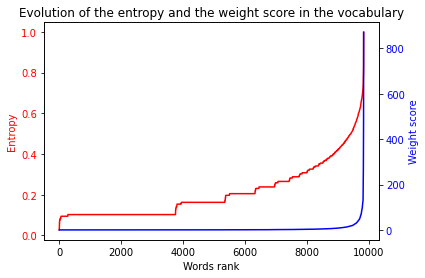

In [26]:
fig, ax1 = plt.subplots()
color = 'red'

ax1.set_xlabel('Words rank')
ax1.set_ylabel('Entropy', color=color)
ax1.plot(sorted(classification['Entropy'].tolist()), color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Weight score', color=color)
ax2.plot(sorted(classification['Weight score'].tolist()), color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Evolution of the entropy and the weight score in the vocabulary")
plt.show()

In [27]:
good_class = classification.loc[classification['Entropy'].between(0.35, 0.85, inclusive=False)]

len(good_class)

<ipython-input-27-c16b721a35a3>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  good_class = classification.loc[classification['Entropy'].between(0.35, 0.85, inclusive=False)]


1445

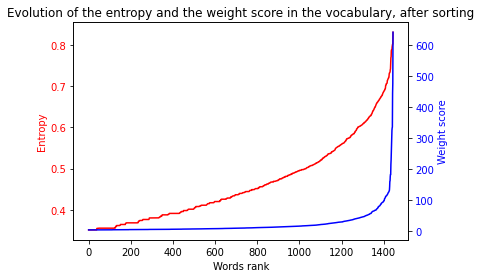

In [28]:
fig, ax1 = plt.subplots()
color = 'red'

ax1.set_xlabel('Words rank')
ax1.set_ylabel('Entropy', color=color)
ax1.plot(sorted(good_class['Entropy'].tolist()), color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Weight score', color=color)
ax2.plot(sorted(good_class['Weight score'].tolist()), color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Evolution of the entropy and the weight score in the vocabulary, after sorting")
plt.show()

In [29]:
bad_class = classification.loc[~classification['Entropy'].between(0.35, 0.85, inclusive=False)]
#tata_class = bad_class.loc[bad_class['Entropy'] >= 0.9]
len(bad_class)

<ipython-input-29-13e3865dcfa4>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  bad_class = classification.loc[~classification['Entropy'].between(0.35, 0.85, inclusive=False)]


8393

In [30]:
index_words = list(bad_class.index.values)

In [31]:
len(index_words)

8393

### Dictionary

In [32]:
for idx in range(len(corpus)):
    corpus[idx] = tokenizer.tokenize(corpus[idx])

In [33]:
# Compute bigrams.
from gensim.models import Phrases

In [34]:
# Add bigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(corpus, min_count=20)
for idx in range(len(corpus)):
    for token in bigram[corpus[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            corpus[idx].append(token)

In [35]:
docs = [[token for token in doc if not token.isnumeric()] for doc in corpus]

In [36]:
docs = [[token for token in doc if len(token) > 1] for doc in docs]

In [37]:
docs = [[token for token in doc if token not in co_stops] for doc in docs]

In [38]:
from gensim.corpora import Dictionary

#### Dictionary with filter_extremes

In [39]:
dictionary1 = Dictionary(docs)
dictionary1.filter_extremes(no_below=5, no_above=0.5)
print(len(dictionary1))

3458


#### Dictionary with filter_tokens

In [40]:
index_words = [word for word in index_words if not word.isnumeric()]
index_words = [word for word in index_words if len(word) > 1]
index_words = [word for word in index_words if word not in co_stops]

In [41]:
len(index_words)

8375

In [42]:
from tqdm.notebook import tqdm

dictionary2 = Dictionary(docs)

for word in tqdm(index_words):
    dictionary2.filter_tokens(bad_ids=[dictionary2.token2id[word]])
print(len(dictionary2))

  0%|          | 0/8375 [00:00<?, ?it/s]

21982


In [43]:
co = [dictionary2.doc2bow(doc) for doc in docs]

In [44]:
co[5], docs[5]

([(204, 1),
  (381, 1),
  (382, 1),
  (383, 1),
  (384, 1),
  (385, 1),
  (386, 1),
  (387, 1),
  (388, 1),
  (389, 1),
  (390, 1),
  (391, 1),
  (392, 1),
  (393, 1),
  (394, 1),
  (395, 1),
  (396, 1),
  (397, 1),
  (398, 1),
  (399, 1),
  (400, 2),
  (401, 1),
  (402, 1),
  (403, 1)],
 ['persu',
  'doni',
  'natura',
  'paisolu',
  'tanl',
  'amatu',
  'respire',
  'eria',
  'pura',
  'castagni',
  'friscatu',
  'maghiu',
  'rose',
  'viole',
  'tofrntti',
  'accustumate',
  'figliole',
  'intornu',
  'scappanu',
  'guiventu',
  'luntanu',
  'abbandona',
  'vecchiu',
  'more',
  'campana',
  'sona',
  'sona',
  'invanu',
  'ingrati',
  'paisani',
  'cuore',
  'arburi',
  'sradicati',
  'andate',
  'puru',
  'eju',
  'curu'])

In [45]:
dictionary2[1500]

'scosgie'

In [46]:
for key, idxinfo in zip([dictionary2[w[0]] for w in co[5]], co[5]):
    print (key, idxinfo)

puru (204, 1)
accustumate (381, 1)
amatu (382, 1)
andate (383, 1)
campana (384, 1)
castagni (385, 1)
eju (386, 1)
friscatu (387, 1)
guiventu (388, 1)
intornu (389, 1)
luntanu (390, 1)
maghiu (391, 1)
more (392, 1)
natura (393, 1)
paisani (394, 1)
paisolu (395, 1)
persu (396, 1)
pura (397, 1)
respire (398, 1)
rose (399, 1)
sona (400, 2)
sradicati (401, 1)
tofrntti (402, 1)
vecchiu (403, 1)


In [47]:
print('Number of unique tokens: %d' % len(dictionary2))
print('Number of documents: %d' % len(co))

Number of unique tokens: 21982
Number of documents: 851


In [48]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 6
chunksize = 1500
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary1.
temp = dictionary2[0]  # This is only to "load" the dictionary1.
id2word = dictionary2.id2token

model = LdaModel(
    corpus=co,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [61]:
top_topics = model.top_topics(co)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)
n = 0
dic_co = {}
for topic in top_topics:
    print()
    top_ = [topic[1]]
    l_ = [w[1] for w in topic[0]]
    print (topic[1], [w[1] for w in topic[0]])
    top_.extend(l_)
    dic_co[f"Topic {n}"] = top_
    n += 1

Average topic coherence: -2.2685.

-1.857674243982065 ['core', 'quantu', 'face', 'amore', 'omu', 'oghie', 'vogliu', 'corsi', 'canta', 'corsu', 'muvra', 'cursichella', 'prestu', 'sole', 'solu', 'pa', 'tempu', 'mancu', 'voce', 'duve']

-1.8786801911820643 ['core', 'amore', 'mamma', 'corsu', 'tempu', 'solu', 'ave', 'face', 'sole', 'sente', 'manu', 'terra', 'puru', 'muvra', 'dolce', 'fiore', 'notte', 'acqua', 'mancu', 'vogliu']

-1.9360348563210599 ['corsu', 'core', 'corsica', 'corsi', 'musa', 'amore', 'manu', 'muvra', 'vogliu', 'annu', 'omu', 'santa', 'statu', 'amicu', 'canzone', 'oghie', 'parla', 'face', 'pare', 'onore']

-1.9523227156296556 ['prestu', 'core', 'pa', 'voce', 'corsu', 'amicu', 'ave', 'statu', 'maghiu', 'qualchi', 'megliu', 'muvra', 'signore', 'pianu', 'solu', 'or', 'ben', 'sorte', 'diu', 'tempu']

-2.180295641258349 ['face', 'core', 'canta', 'vede', 'sole', 'manu', 'pianu', 'cantu', 'solu', 'notte', 'pueta', 'mancu', 'voce', 'nantu', 'sente', 'corre', 'amu', 'corsu', 'celu

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
col_names = ['Topic coherence']

for i in range(20):
    col_names.append(f'Word {i + 1}')

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
df_coherence = pd.DataFrame(data=dic_co, index=col_names)

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
df_coherence

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
Topic coherence,-1.857674,-1.87868,-1.936035,-1.952323,-2.180296,-3.805783
Word 1,core,core,corsu,prestu,face,cirnu
Word 2,quantu,amore,core,core,core,quindecina
Word 3,face,mamma,corsica,pa,canta,sgio
Word 4,amore,corsu,corsi,voce,vede,corsu
Word 5,omu,tempu,musa,corsu,sole,omu
Word 6,oghie,solu,amore,amicu,manu,iu
Word 7,vogliu,ave,manu,ave,pianu,corsica
Word 8,corsi,face,muvra,statu,cantu,invernu
Word 9,canta,sole,vogliu,maghiu,solu,duve


In [65]:
print(model.print_topics())

[(0, '0.005*"corsu" + 0.004*"core" + 0.003*"corsica" + 0.003*"corsi" + 0.003*"musa" + 0.003*"amore" + 0.002*"manu" + 0.002*"muvra" + 0.002*"vogliu" + 0.002*"annu"'), (1, '0.004*"core" + 0.003*"quantu" + 0.003*"face" + 0.002*"amore" + 0.002*"omu" + 0.002*"oghie" + 0.002*"vogliu" + 0.002*"corsi" + 0.002*"canta" + 0.002*"corsu"'), (2, '0.004*"cirnu" + 0.002*"quindecina" + 0.002*"sgio" + 0.002*"corsu" + 0.002*"omu" + 0.002*"iu" + 0.002*"corsica" + 0.002*"invernu" + 0.002*"duve" + 0.001*"altra"'), (3, '0.003*"face" + 0.003*"core" + 0.003*"canta" + 0.003*"vede" + 0.003*"sole" + 0.003*"manu" + 0.003*"pianu" + 0.002*"cantu" + 0.002*"solu" + 0.002*"notte"'), (4, '0.003*"prestu" + 0.003*"core" + 0.003*"pa" + 0.002*"voce" + 0.002*"corsu" + 0.002*"amicu" + 0.002*"ave" + 0.002*"statu" + 0.002*"maghiu" + 0.002*"qualchi"'), (5, '0.008*"core" + 0.006*"amore" + 0.003*"mamma" + 0.003*"corsu" + 0.003*"tempu" + 0.003*"solu" + 0.003*"ave" + 0.003*"face" + 0.003*"sole" + 0.003*"sente"')]


/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
print(model.get_document_topics(co[500]))

[(4, 0.997559)]


/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Wordclouds

In [66]:
from wordcloud import WordCloud

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
def draw_word_cloud(index):
     

    wordcloud = WordCloud(width=600, height=600, background_color='white').fit_words(dict(model.show_topic(index, 30)))
    #y = plt.figure( figsize=(5,5))
    #y = plt.imshow(wordcloud)
    #y = plt.axis("off")
    #y = plt.tight_layout()
    return wordcloud

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use tex

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use tex

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use tex

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transp

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.


/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use tex

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.


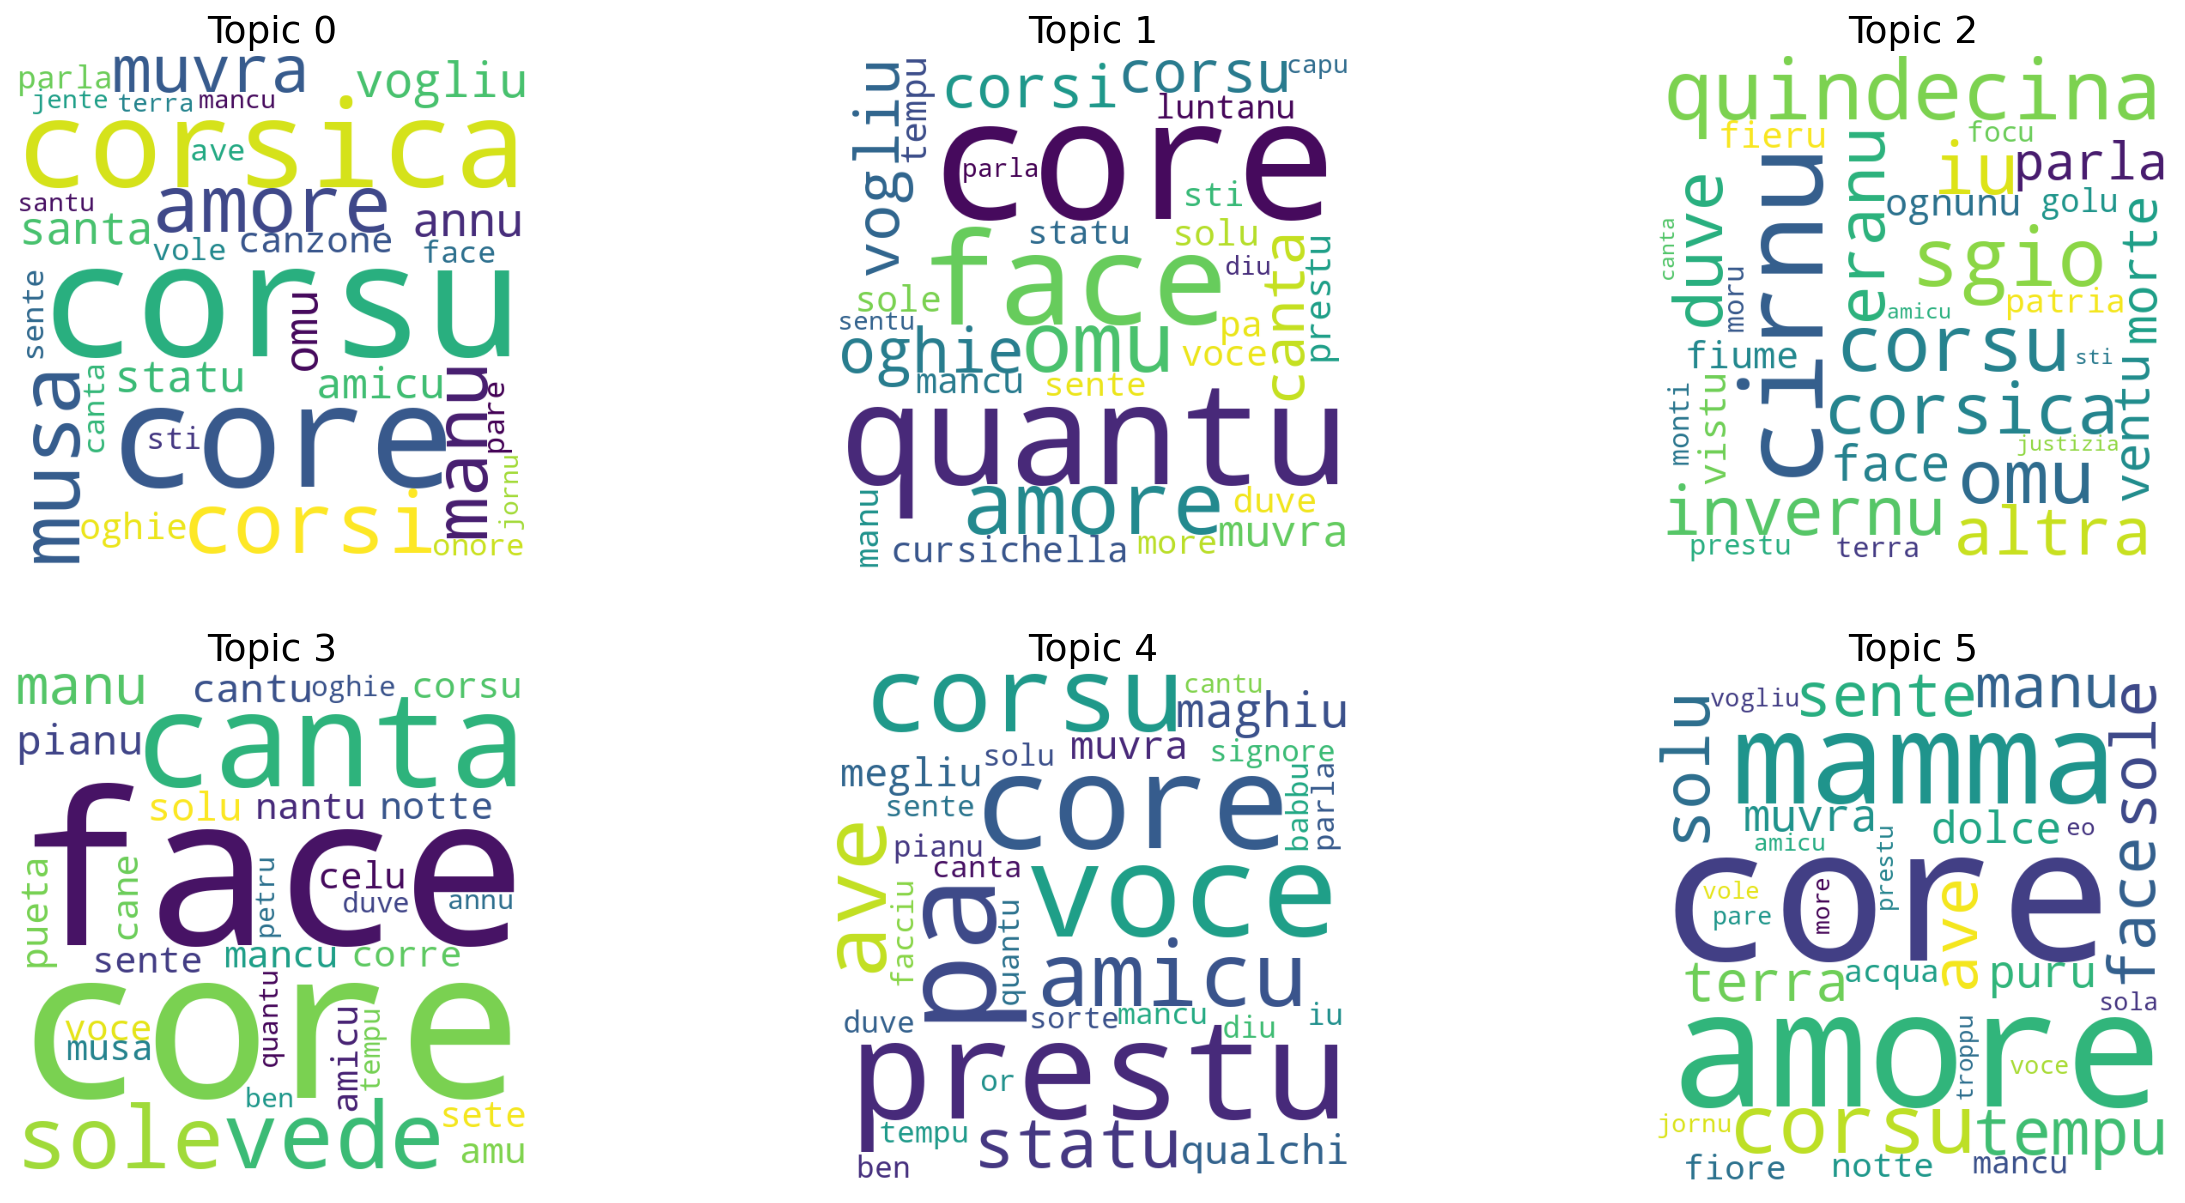

In [68]:
fig = plt.figure(figsize=(20,10), dpi=150)
for i in range(model.num_topics):
    ax = fig.add_subplot(2, 3 ,i+1)
    wordcloud = draw_word_cloud(i)
    
    titre = f"Topic {i}"
    ax.imshow(wordcloud)
    ax.axis('off')
    ax.set_title(titre, fontsize=18)

### pyLDAvis

In [57]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [58]:
pyLDAvis.enable_notebook()

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
lda_viz = gensimvis.prepare(model, co, dictionary2)

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [60]:
lda_viz

/home/vincent/miniconda3/envs/hn/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.070021  0.008314       1        1  32.630777
3     -0.024664 -0.091730       2        1  17.019589
1     -0.023311  0.019107       3        1  16.068845
0     -0.016455  0.031525       4        1  15.873074
4     -0.000885  0.037827       5        1  12.278665
2      0.135337 -0.005044       6        1   6.129050, topic_info=            Term        Freq       Total Category  logprob  loglift
340        cirnu   75.000000   75.000000  Default  30.0000  30.0000
18       corsica  100.000000  100.000000  Default  29.0000  29.0000
6962  quindecina   10.000000   10.000000  Default  28.0000  28.0000
218         sgio   69.000000   69.000000  Default  27.0000  27.0000
544        corsu  191.000000  191.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
62        prestu    4.389515  113.775716   Topic6  -6.8322  -0.4629
886        terra    4.372802  111.983922   Topic6  -6.8360  -0.4508
150        amicu    4.182136  120.017495   Topic6  -6.8806  -0.5647
324          sti    4.015891   87.970371   Topic6  -6.9211  -0.2946
667        canta    4.046198  128.086972   Topic6  -6.9136  -0.6628

[483 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
5277       5  0.718204  accunzenta
15444      3  0.678086  acellucciu
91         1  0.597507       acqua
91         2  0.146328       acqua
91         3  0.097552       acqua
...      ...       ...         ...
145        6  0.021068        vole
10036      1  0.909245      vorrei
5275       5  0.477178       vuoli
6232       4  0.679405         zin
19526      6  0.780100  zitidducci

[1188 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 2, 1, 5, 3])